## LINEAR MODEL

In [1]:
import pandas as pd
df=pd.read_csv("schwab_ads.csv")
df.head()

,Web,Bus_Stop,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
#a. New variable
df["total_spending"]=df["Web"]+df["Bus_Stop"]+df["Newspaper"]

In [3]:
df.head()

,Web,Bus_Stop,Newspaper,Sales,total_spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [4]:
# b. Correlation with total_spending
correlation = df['total_spending'].corr(df['Sales'])
print("Correlation between total spending and sales:", correlation)

Correlation between total spending and sales: 0.924917006249931


The correlation coefficient of 0.925 suggests a strong positive relationship between total marketing spending and sales. This means that as the amount of money spent on marketing increases, sales tend to increase.

However, it's important to note that correlation does not imply causation. We can't conclude that more advertising spending directly leads to more sales based on this correlation alone because there might be other reasons for this relation.

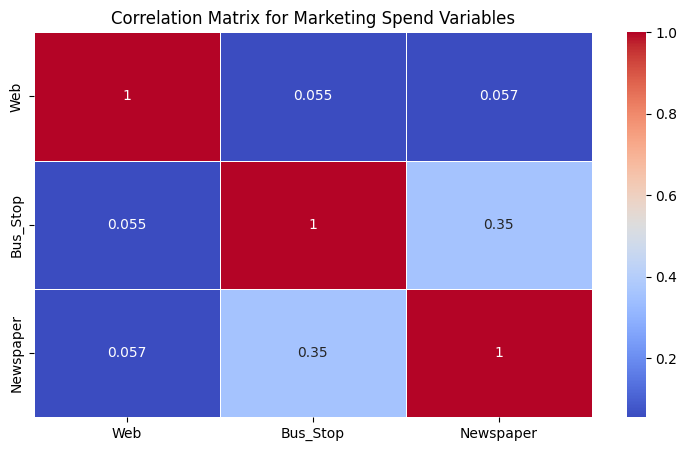

In [5]:
# c. Correlation with web, bus stop ad, and newspaper spending
import seaborn as sns
import matplotlib.pyplot as plt

spending_data = df[['Web', 'Bus_Stop', 'Newspaper']]

# Calculating the correlation matrix
correlation_matrix = spending_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Marketing Spend Variables')
plt.show()

As you can see above, there is no a strong relationship between these variables- max correlation is 0.35- so we can continue with these variables our model.

In [6]:
# d. Build Model
import statsmodels.api as sm

# independent variables (X) and the dependent variable (Y)
X = df[['Web', 'Bus_Stop', 'Newspaper']]
Y = df['Sales']

# Adding a constant to the model
X = sm.add_constant(X)

# Building the ordinary least squares (OLS) model
model = sm.OLS(Y, X).fit()

# The summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           8.13e-99
Time:                        16:18:14   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

p value of F statictic for this model is 8.13e-99, this is an extremely small number. The very small p-value of the F-statistic suggests that at least one of the predictor variables (Web spending, Bus stop ad spending, or Newspaper spending) is significantly related to the sales. It indicates a strong evidence that my model is statistically significant.


Web spending:
p-value: 0.000
This suggests that Web spending has a statistically significant positive effect on sales. This means that Web spending is a very effective predictor of sales.

Bus Stop ad spending:
p-value: 0.000
Similar to Web spending, Bus Stop ad spending also shows a statistically significant positive effect on sales.

Newspaper spending:
p-value: 0.954
Unlike the other two predictors, Newspaper spending does not show a statistically significant effect on sales.


In [7]:
# E. Build better model
import statsmodels.api as sm

# Create the interaction term
df['Web_BusStop_Interaction'] = df['Web'] * df['Bus_Stop']

X = df[['Web', 'Bus_Stop', 'Web_BusStop_Interaction']]

Y = df['Sales']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          3.90e-104
Time:                        16:19:14   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- Web Spending
p-value: 0.000
The low p-value suggests that web ad spending is highly significant in predicting sales. This means that increases in web ad spending are strongly associated with increases in sales.

- Bus Stop Ad Spending:
p-value: 0.005
Bus stop ad spending is also statistically significant, though less so compared to web ad spending. It still positively affects sales, indicating that higher spending on bus stop ads is associated with higher sales.

- Interaction between Web and Bus Stop Ad Spending:
p-value: 0.000
The interaction term has a very low p-value, indicating that the combined effect of web and bus stop ad spending on sales is statistically significant.



In [8]:
#Without intecation variables:
X = df[['Web', 'Bus_Stop']]

Y = df['Sales']

X = sm.add_constant(X)

simple_model = sm.OLS(Y, X).fit()

print(simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          2.39e-100
Time:                        16:19:48   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

Model with interaction term has 0.914 R squared value, while the new model has 0.941. The model with the interaction term between web and bus stop ads shows how these ads work together to affect sales. The simpler model, without the interaction, is easier to understand and shows a higher R-squared, indicating it explains more about sales using fewer details. The best model to choose depends on whether you need simple explanations or detailed insights about how advertising influence sales together.

In [9]:
# create new data point for estimate
new_data = pd.DataFrame({
    'const': [1],  # add a constant term (intercept)
    'Web': [150],  # units of web ad spending
    'Bus_Stop': [24]  # units of bus stop ad spending
})

predicted_sales = simple_model.predict(new_data)

print(f"Predicted sales: {predicted_sales[0]:.2f} units")

Predicted sales: 15.37 units


Based on my model and the input values of 150 units of web ad spending and 24 units of bus stop ad spending, the predicted sales outcome is approximately 15 units.It suggests that with this level of investment in advertising, the marketer can expect sales to be around 15.37 units, given the model's current understanding of the data and relationships between these variables.

The interaction effect in a regression model tells us whether spending money on both advertising channels together does something that wouldn't be expected just by looking at each ad individual effect.

For a marketer, this means that the interaction effect can show combining web and bus stop advertisements could lead to a greater increase in sales than just the their separate impacts. For example, if the interaction effect is significant, it could suggest that bus stop ads might be more effective in driving sales when they are supported by web advertising, because this way we could increase brand visibility across multiple platforms.